## ExtractHoles Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This `Op` fills in any holes (defined as a group of "off" pixels surrounded "on" pixels on all sides) in a binary image. The `Op` is called as follows:

In [2]:
ij.op().help("extractHoles")

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.morphology.extractHoles.DefaultExtractHolesComputer(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in,
		Shape structElement?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.morphology.extractHoles.DefaultExtractHolesFunction(
		RandomAccessibleInterval in,
		Shape structElement?)

Note the parameters here:

* `RandomAccessibleInterval out`: the **(optional)** output image. If an output is given `DefaultExtractHolesComputer` is run, and `DefaultExtractHolesFunction` is run with no preallocated output.
* `RandomAccessibleInterval in1`: the input image
* `Shape structElement`: an **optional** parameter that defines how large of a space the `Op` searches when filling the holes. When the `Op` finds an "off" value that it determines is not an edge it will attempt to fill that "off" pixel and any neighboring values (where the `Neighborhood` is defined by this `Shape`) that are also "off" and not separated from the current value by an "on" pixel. Most of the time no value needs to be passed through, so thus we leave this parameter out of the notebook. 

We need to get a binary image to perform any morphological operations. Let's get a grayscale image and then binarize it using [the Huang Threshold Op](../threshold/threshold.ipynb#Huang-Thresholding):

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


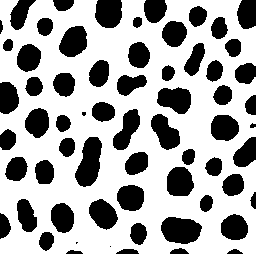

In [3]:
input_full = ij.scifio().datasetIO().open("http://imagej.net/images/blobs.gif")

    //input_full has 3 channels. We only need one.
    input = ij.op().run("hyperSliceView", input_full, 2, 0)

    binaryInput = ij.op().run("threshold.huang", input)

ij.notebook().display(binaryInput)

Now that we have our image, let's fill in all of these holes. Note that the blobs that are on the edges of the image aren't really "holes" (since they are not surrounded by "on" pixels on all sides", thus they will not be filled in:

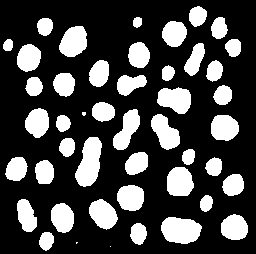

In [4]:
import net.imglib2.algorithm.neighborhood.RectangleShape

output = ij.op().run("extractHoles", binaryInput)

ij.notebook().display(output)

To show the difference, let's [stack](../transform/stackView.ipynb) the images to see the difference:

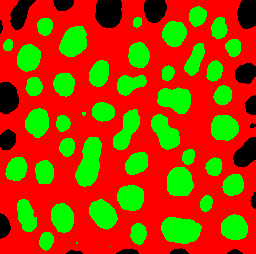

In [5]:
import net.imglib2.img.Img

list = new ArrayList<Img>()

//red in stacked image
list.add(binaryInput)
//green in stacked image
list.add(output)

stacked = ij.op().run("stackView", list)

ij.notebook().display(stacked)

Note that all of the non-edge blobs being green in the stacked image, where `extractHoles` found all of the "off" values in the original and returned all of them "on" (hence the green color).